# Kmeans Example

## Solution found by algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Centroids found by algorithm:
 [[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]


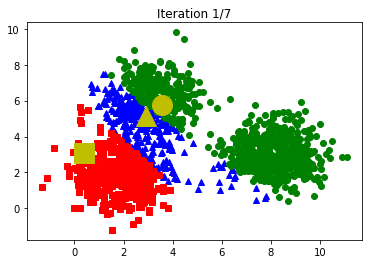

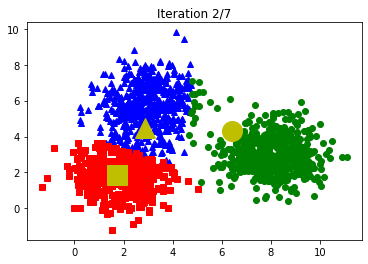

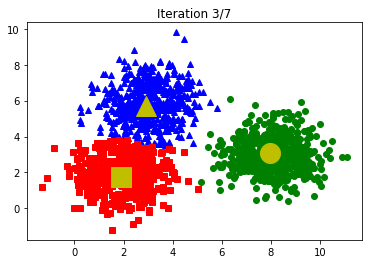

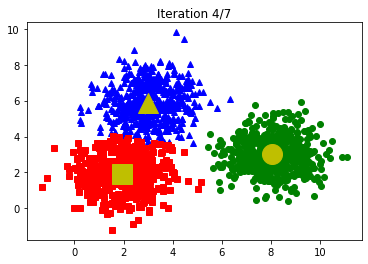

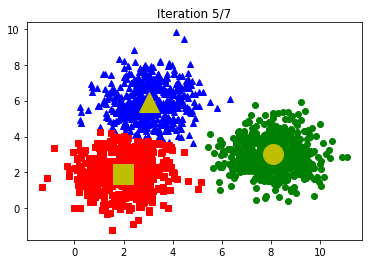

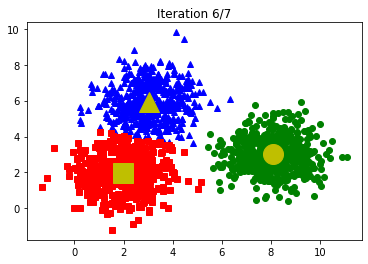

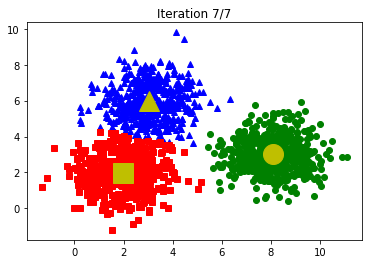

In [34]:
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(mean=means[0], cov=cov, size=N) # X0.shape = (N, 2) = (500, 2)
X1 = np.random.multivariate_normal(mean=means[1], cov=cov, size=N)
X2 = np.random.multivariate_normal(mean=means[2], cov=cov, size=N)
X = np.concatenate((X0, X1, X2), axis=0) # X.shape = (1500, 2)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N)

def kmeans_init_centroids(X, K):
    # Randomly pick K data points from X as K initial centroids (K rows of X)
    return X[np.random.choice(X.shape[0], K, replace=False)]
    # Chọn randome K mẫu từ np.arange(X.shape[0])=[0, 1, 2, ..., X.shape[0] - 1]

# Xác định nhãn mới cho các điểm khi biết các centroids
def kmeans_assign_labels(X, centroids):
    D = cdist(X, centroids) # D.shape = (X.shape[0], centroids.shape[0]) = (N, K)
    return np.argmin(D, axis=1) # Nhãn của mỗi điểm là cụm có kc gần nhất tới điểm đó
                                # Từ mỗi hàng của X, trả về chỉ số của phần tử nhỏ nhất
    
def has_coverged(centroids, new_centroids):
    return set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids])

# Xác định các tâm cụm mới khi biết các nhãn
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids

# Thuật toán K-means
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while(True):
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if not has_coverged(centroids[-1], new_centroids):
            centroids.append(new_centroids)
        else: break
        it += 1
    return centroids, labels, it

def kmean_display(X, centroids, labels, it, i):
    X0 = X[labels == 0, :]
    X1 = X[labels == 1, :]
    X2 = X[labels == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^')
    plt.plot(X1[:, 0], X1[:, 1], 'go')
    plt.plot(X2[:, 0], X2[:, 1], 'rs')

    plt.plot([centroids[0][0]], [centroids[0][1]], 'y^', markersize=20)
    plt.plot([centroids[1][0]], [centroids[1][1]], 'yo', markersize=20)
    plt.plot([centroids[2][0]], [centroids[2][1]], 'ys', markersize=20)
    
    plt.title('Iteration ' + str(i) + '/' + str(it))
    plt.show()
        
(centroids, labels, it) = kmeans(X, K)
print('Centroids found by algorithm:\n', centroids[-1])
for i in range(it):
    kmean_display(X, centroids[i], labels[i], it, i + 1)

## Solution found by sklearn

In [35]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
print('Centroids found by sklearn:\n', model.cluster_centers_)

Centroids found by sklearn:
 [[1.9834967  1.96588127]
 [8.07476866 3.01494931]
 [3.02702878 5.95686115]]


# Image Application

## Image Segmentation

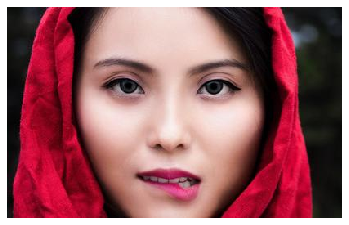

In [37]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

img = mpimg.imread('girl3.jpg') # img.shape = (258, 410, 3)
plt.imshow(img)
plt.axis('off')
plt.show()

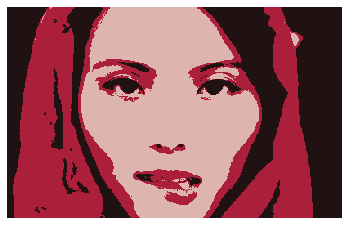

In [57]:
X = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
for K in [3]:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    label = kmeans.predict(X)
    
    img1 = np.zeros_like(X)
    for i in range(K):
        img1[label == i] = kmeans.cluster_centers_[i]
    
    img1 = img1.reshape(img.shape[0], img.shape[1], img.shape[2])
    plt.imshow(img1)
    plt.axis('off')
    plt.show()

## Image Compression

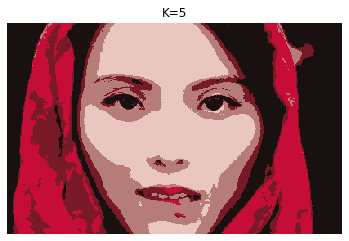

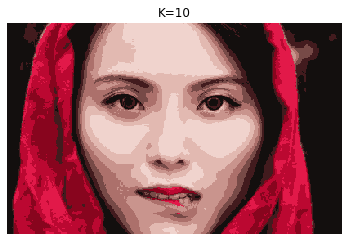

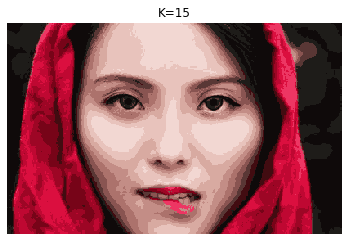

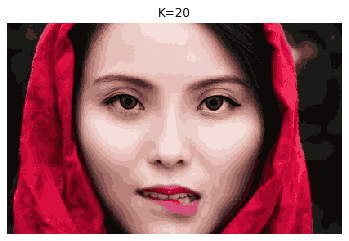

In [63]:
for K in [5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    label = kmeans.predict(X)
    
    img1 = np.zeros_like(X)
    for i in range(K):
        img1[label == i] = kmeans.cluster_centers_[i]
    
    img1 = img1.reshape(img.shape[0], img.shape[1], img.shape[2])
    plt.imshow(img1)
    plt.title('K=' + str(K))
    plt.axis('off')
    plt.show()